# Homework 3

**Bootstrap and Testing**

1. Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.
2. Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?
3. Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [29]:
# running our functions
%run ../ourFunctions.py

In [30]:
# load titanic data
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Task 1
### Task 1.1
* **Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.**
    * toss away first class and men for this exercise

In [31]:
FemPass12 = titanic[(titanic['pclass']!=3) & (titanic['sex']=='female')]

# mean survival rate female first class 
a = FemPass12[FemPass12['pclass']==1]['survived'].mean()

# mean survival rate female second class
b = FemPass12[FemPass12['pclass']==2]['survived'].mean()

print(f'mean survival rate female first class: {a}')
print(f'mean survival rate female second class: {b}')

mean survival rate female first class: 0.9680851063829787
mean survival rate female second class: 0.9210526315789473


In [51]:
def print_pVal(pVal,a,empirical_diff_means):
    s = "smaller";s2 = "";s3="is extremely unlikely to"
    if (pVal >= a):
        s = "greater or equal"
        s2 = "fail to"
        s3 ="could"
        
    print("The one sided p value of", np.round(pVal,3), "is ",s," than alpha=",a,", so we",s2," reject the Null" ) 

    print("-> The observed difference of ", np.round(empirical_diff_means,3), s3," have occurred by chance alone")


def bs_2sampletest(titanic, M=1000, func = np.mean, a = 0.05):
    
    # pooled mean
    meanNull = np.mean(titanic[titanic['pclass']!=3]['survived'])
    
    p1 = titanic[titanic['pclass']==1]['survived']
    p2 = titanic[titanic['pclass']==2]['survived']

    empirical_diff_means = np.mean(p2)-np.mean(p1) 
   
    #shift:
    p2_shifted = p2 - np.mean(p2) + meanNull
    #plt.hist(p2_shifted, density=True, color="red");
    p1_shifted = p1 - np.mean(p1) + meanNull
    #plt.hist(p1_shifted, density=True, color="blue");
    

    # Compute 1000 bootstrap replicates from shifted arrays
    bs_replicates_m = draw_bs_reps(p2_shifted, func, M)
    bs_replicates_f = draw_bs_reps(p1_shifted, func, M)
    ##plt.hist(bs_replicates_m, density=True, color="red", alpha=0.5)
    #plt.hist(bs_replicates_f, density=True, color="blue", alpha=0.5)
    
    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_m - bs_replicates_f
    plt.hist(bs_replicates, density=True, color="blue", alpha=0.5)
    plt.vlines(empirical_diff_means, 0,15)
    
    # Compute and print p-value: p
    pVal = np.mean(bs_replicates > empirical_diff_means)
    print_pVal(pVal,a,empirical_diff_means)
    return bs_replicates

The one sided p value of 0.898 is  greater or equal  than alpha= 0.05 , so we fail to  reject the Null
-> The observed difference of  -0.047 could  have occurred by chance alone


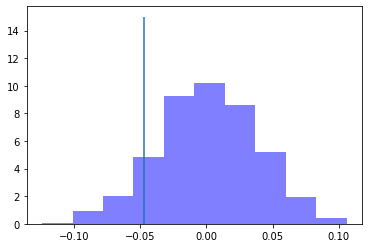

In [52]:
bs_replicates=bs_2sampletest(FemPass12)
#plt.hist(bs_replicates, density=True);

### Task 1.2
* **Create a boxplot mpg ~ cylinders. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?**


In [15]:
# load auto dataframe
cars = pd.read_csv('../data/Auto.csv')

# cars with 3 or 4 cylinders
cars34 = cars[ (cars['cylinders']==3) | (cars['cylinders']==4)]
cars.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick


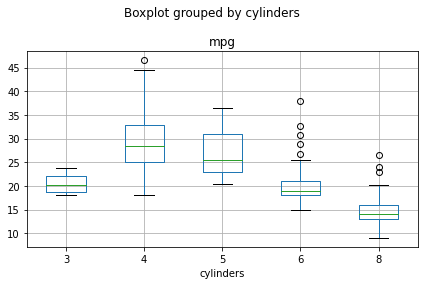

In [16]:
tmp=cars.boxplot( "mpg","cylinders")
plt.tight_layout()

So, the observed mean for cyl==4 is larger than for cyl==3, which implies that we need to test 
$$
H_0: \mu_4 \leq \mu_3, H_A: \mu_4 > \mu_3, 
$$
or, in some other books:
$$
H_0: \mu_4 == \mu_3, H_A: \mu_4 > \mu_3, 
$$
(Why ? Your Null hypothesis cannot "agree with the data", you need to choose $H_0$ to be in conflict with the observed evidence. Otherwise, there is nothing to refute/test)

Hence, this is a right-sided test, which means we can only reject on the right tail.

In [59]:
def bs_2sampletest(df, M=1000, func = np.mean, a = 0.05):
    
    # pooled mean
    meanNull = np.mean(df['mpg'])
    
    mpg3 = df[df['cylinders']==3]['mpg']
    mpg4 = df[df['cylinders']==4]['mpg']

    empirical_diff_means = np.mean(mpg4)-np.mean(mpg3) 
    
    #shift:
    mpg3_shifted = mpg3 - np.mean(mpg3) + meanNull
    mpg4_shifted = mpg4 - np.mean(mpg4) + meanNull

    # Compute M bootstrap replicates from shifted arrays
    bs_replicates_3 = draw_bs_reps(mpg3_shifted, func, M)
    bs_replicates_4 = draw_bs_reps(mpg4_shifted, func, M)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_4 - bs_replicates_3
    plt.hist(bs_replicates, density=True, color="blue", alpha=0.5)
    plt.vlines(empirical_diff_means, 0,0.3)
    
    # Compute and print p-value: p
    pVal = np.mean(bs_replicates > empirical_diff_means)
    #cutoff right tail
    #np.percentile(bs_replicates, 95)
    s = "smaller";s2 = "";s3="is extremely unlikely to"
    if (pVal >= a):
        s = "greater or equal"
        s2 = "fail to"
        s3 ="could"
        
    print("The one sided p value of", np.round(pVal,3), "is ",s," than alpha=",a,", so we",s2," reject the Null" ) 

    print("-> The observed difference of ", np.round(empirical_diff_means,3), s3," have occurred by chance alone")

    return bs_replicates

The one sided p value of 0.0 is  smaller  than alpha= 0.05 , so we   reject the Null
-> The observed difference of  8.734 is extremely unlikely to  have occurred by chance alone


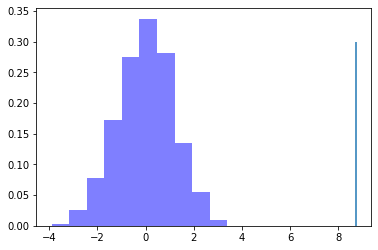

In [60]:
bs_replicates=bs_2sampletest(cars34, M=5000)
#plt.hist(bs_replicates, density=True, bins=20);

### Task 1.3
* **Can you think of more interesting hypotheses to test regarding the pregnancy data ?**

In [64]:
# load pregnancy dataframe
preg = pd.read_csv("../data/pregNSFG.csv.gz").drop(["Unnamed: 0"],axis=1)
#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')

#only look at live births
live = preg[preg.outcome == 1]
live.head(2)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750


* We saw a significant difference between male and female babies weights. Could it be that the lion share of the weight gain is "achieved" in the last weeks of the pregnancy ?
* So let us test the weight difference for premature babies only:

In [65]:
#we reduce the sample size further by conditioning on the mother's age at the end of pregnancy
#firsts = preg[(preg.outcome == 1) & (preg.birthord == 1)]
bwt = live[(live['agepreg'] < 40) & (live['prglngth'] < 30)][["babysex","totalwgt_lb"]] 

# replacing for male and female
bwt['babysex'].replace([1.0],"male",inplace=True)
bwt['babysex'].replace([2.0],"female",inplace=True)

# dropping empty cells
bwt = bwt.dropna()

bwt

,babysex,totalwgt_lb
138,female,6.5000
157,male,1.3750
237,male,6.3750
541,male,1.3750
628,female,1.6250
...,...,...
12717,male,7.0000
12938,female,2.1875
13093,male,3.0000
13173,male,1.5000


In [72]:
print(np.mean(w_m))
print(np.mean(w_f))

3.4288793103448274
3.392857142857143


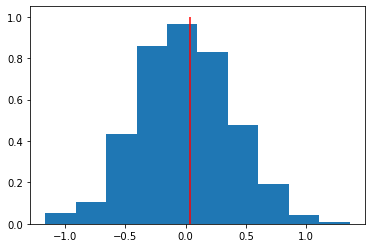

In [76]:
# pooled mean
meanNull = np.mean(bwt['totalwgt_lb'])

w_m = bwt[bwt["babysex"]=="male"].totalwgt_lb
w_f = bwt[bwt["babysex"]=="female"].totalwgt_lb

empirical_diff_means = np.mean(w_m)-np.mean(w_f) 

#shift:
w_m_shifted = w_m - np.mean(w_m) + meanNull
w_f_shifted = w_f - np.mean(w_f) + meanNull


# Compute 1000 bootstrap replicates from shifted arrays
M=1000
bs_replicates_m = draw_bs_reps(w_m_shifted, np.mean, M)
bs_replicates_f = draw_bs_reps(w_f_shifted, np.mean, M)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

plt.hist(bs_replicates, density=True)
plt.vlines(empirical_diff_means,0,1,color="red")

In [75]:
a=0.05
pVal = np.mean(bs_replicates > empirical_diff_means)
print_pVal(pVal,a,empirical_diff_means)

The one sided p value of 0.448 is  greater or equal  than alpha= 0.05 , so we fail to  reject the Null
-> The observed difference of  -0.036 could  have occurred by chance alone
